Kelompok 8:
1. Aurelio Naufal Effendy (2106638526)
2. Esly Vani Frasanti Saragih (2106700782)
3. Jihan Sandrina Halim (2106708160)
4. Zahrah Mahfuzah (2106704004)

Link github tugas : https://github.com/Aurelio-Naufal/Tugas-EDA-Data-Mining-Data-Property-Indonesia

<center><h2><strong><font color="green">Case Study 01 - Data Mining dan Business Intelligence: EDA pada data Property Indonesia</font></strong></h2></center>

# **Kasus:**
* Anda adalah seorang Data Analyst yang bekerja di PT **Ray Pink Property Indonesia** (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
*Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

# Petunjuk:
Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi over lunch dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. **Kualitas data** yang dimiliki perusahaan.
2. Apakah ada **saran perbaikan data ke DE/DBA** perusahaan agar RPPI menjadi data driven company yang unggul.
3. Dari data yang ada, apakah ada **kecenderungan rumah disuatu kota lebih mahal/murah** dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat **rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana?** Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan **karakteristik seperti apa yang paling banyak dijual**?
6. Jika RPPI ingin melakukan **investasi (max) Rp. 25 Milyar** minggu besok, apakah dari data anda dapat memberikan **rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan** bagi perusahaan?
7. Dan yang terpenting, **informasi berharga** apa lagi yang bisa anda dapatkan dari data?

# **Import Modules dan Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# untuk iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# import data
!gdown 13gWwkRYNS99Uwd5oxPucUmiegKiFdX7k

Downloading...
From: https://drive.google.com/uc?id=13gWwkRYNS99Uwd5oxPucUmiegKiFdX7k
To: /content/Data-Property-Indonesia-Ganjil-2023.xlsx
100% 779k/779k [00:00<00:00, 132MB/s]


In [ ]:
# data didownload terlebih dahulu baru dapat di run
file = '/content/Data-Property-Indonesia-Ganjil-2023.xlsx'
sheets = pd.read_excel(file, sheet_name = None)

In [ ]:
# merge data
from pandas.io.excel import ExcelWriter
with ExcelWriter(file) as writer:
  for name, sheet in sheets.items():
    sheet.rename(columns = {sheet.columns[0]:"created_at", sheet.columns[1]:"LT", sheet.columns[2]:"LB",
                            sheet.columns[3]:"KT", sheet.columns[4]:"KM", sheet.columns[5]:"garasi",
                            sheet.columns[6]:"carport", sheet.columns[7]:"lokasi", sheet.columns[8]:"sertifikat",
                            sheet.columns[9]:"listrik", sheet.columns[10]:"hadap", sheet.columns[11]:"harga",
                            sheet.columns[12]:"url", sheet.columns[13]:"deskripsi"}, inplace = True)
    sheet.to_excel(excel_writer = writer, sheet_name  = name, index = False)
  writer.save()

<ipython-input-4-436ac2d60551>:11: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
df = pd.concat(sheets)
df = df.reset_index()

# pre-view data
df.head()

,level_0,level_1,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,Unnamed: 14
0,Bogor,0,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",NaN
1,Bogor,1,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
2,Bogor,2,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
3,Bogor,3,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
4,Bogor,4,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN


# Data Understanding (DU):

Keterangan Variabel:



*   Created_at: Tanggal dimana iklan rumah
*   LT : Luas Tanah properti yang ditawarkan
*   LB : Luas Bangunan properti yang ditawarkan
*   KT : Jumlah Kamar Tidur properti yang ditawarkan
*   KM : Jumlah Kamar Mandi properti yang ditawarkan
*   Garasi : Jumlah Kapasitas Garasi di properti yang ditawarkan
*   Carport : Kapasitas Carport di properti yang ditawarkan
*   Lokasi : Detail lokasi properti yang ditawarkan
*   Sertifikat: Jenis sertifikat properti yang ditawarkan
*   Listrik : Daya listrik dari properti yang ditawarkan
*   Hadap : Keterangan property yang ditawarkan menghadap ke arah mana
*   Harga : Harga property yang ditawarkan dalam Rupiah
*   URL : Alamat tautan (link) property yang ditawarkan.
*   Deskripsi : Deskripsi iklan property yang ditawarkan.

# **Pre-Processing**

In [ ]:
df.info() #cek info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      3084 non-null   object 
 1   level_1      3084 non-null   int64  
 2   created_at   3066 non-null   object 
 3   LT           3067 non-null   object 
 4   LB           3065 non-null   float64
 5   KT           3064 non-null   object 
 6   KM           3062 non-null   object 
 7   garasi       2014 non-null   object 
 8   carport      2511 non-null   object 
 9   lokasi       3066 non-null   object 
 10  sertifikat   3057 non-null   object 
 11  listrik      2842 non-null   object 
 12  hadap        1400 non-null   object 
 13  harga        3064 non-null   object 
 14  url          3063 non-null   object 
 15  deskripsi    3041 non-null   object 
 16  Unnamed: 14  6 non-null      object 
dtypes: float64(1), int64(1), object(15)
memory usage: 409.7+ KB


Diketahui bahwa terdapat **3084 data/entri** perumahan dalam database. Kemudian masih **banyak variabel yang tipe datanya belum sesuai** dengan yang seharusnya. Contohnya adalah variabel LT, KT, KM, garasi, carport, dan harga harusnya variabel integer/float bukan sebuah object. Lalu terdapat beberapa kolom yang masih salah penamaan (seperti level_0 dan level_1 dan Unnamed : 14)

In [ ]:
# rename column
df.rename(columns = {'level_0' :'wilayah'}, inplace=True) #ubah kolom pertama menjadi wilayah
df.head()

,wilayah,level_1,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,Unnamed: 14
0,Bogor,0,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",NaN
1,Bogor,1,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
2,Bogor,2,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
3,Bogor,3,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
4,Bogor,4,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN


In [ ]:
df.drop(['level_1', 'Unnamed: 14'], axis = 1, inplace = True)
#drop kolom level_1 karena hanya menunjukan urutan/index pada wilayah masing-masing, dan kolom Unnamed :14

df.head()

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi
0,Bogor,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,Bogor,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,Bogor,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,Bogor,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,Bogor,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...


## **Cek dan Ubah Tipe Data**

In [ ]:
df.info() #cek info data dan tipe datanya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wilayah     3084 non-null   object 
 1   created_at  3066 non-null   object 
 2   LT          3067 non-null   object 
 3   LB          3065 non-null   float64
 4   KT          3064 non-null   object 
 5   KM          3062 non-null   object 
 6   garasi      2014 non-null   object 
 7   carport     2511 non-null   object 
 8   lokasi      3066 non-null   object 
 9   sertifikat  3057 non-null   object 
 10  listrik     2842 non-null   object 
 11  hadap       1400 non-null   object 
 12  harga       3064 non-null   object 
 13  url         3063 non-null   object 
 14  deskripsi   3041 non-null   object 
dtypes: float64(1), object(14)
memory usage: 361.5+ KB


Terdapat beberapa rekomendasi untuk perubahan bentuk data dari masing-masing kolom
*  Ubah kolom wilayah, sertifikat, hadap menjadi category
*  Ubah kolom LT, listrik, KT, KM, garasi, carport, harga menjadi float

#### Cek Input data dari Masing-Masing Kolom Lalu Ubah Variabelnya

### **Wilayah**

In [ ]:
# cek kategori pada kolom wilayah
df['wilayah'].value_counts()

Bogor                         295
Kalimantan (All)              219
Padang - Palembang            218
Tangerang                     214
Jakarta                       210
Depok                         205
Bandung                       201
Yogyakarta                    201
Medan                         197
Surabaya                      197
Semarang                      194
Bekasi                        193
Bali                          191
Lampung - Sumatera selatan    184
Sulawesi(All)                 165
Name: wilayah, dtype: int64

In [ ]:
# ubah kolom wilayah menjadi kategori
df['wilayah'] = df['wilayah'].astype('category')

### **Created_at**

In [ ]:
# ubah kolom created_at menjadi datetime
df['created_at'] = pd.to_datetime(df['created_at'])

<ipython-input-12-f7b4bb371cb9>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'])


### **Sertifikat**

In [ ]:
# cek kategori pada kolom sertifikat
df['sertifikat'].value_counts()

SHM                                2727
SHGB                                121
HGB                                 117
lainnya(PPJB, GIRIK, ADAT, dll)      20
SHM + IMB                            17
Lainnya                              14
PPJB                                 11
SPPJB                                 4
SHM - IMB                             4
HP                                    3
Lainnya (PPJB,Girik,Adat,dll)         3
SHM,IMB                               2
SHM                                   2
PPJB,Girik,Adat,dll                   2
-                                     2
Hak Pakai                             1
AJB                                   1
SHM + Hak Pakai                       1
HJB                                   1
SHM & IMB                             1
SHBG                                  1
SMB                                   1
SHM + IMB + PBB                       1
Name: sertifikat, dtype: int64

Terlihat masih berantakan sehingga perlu disamakan.

In [ ]:
df['sertifikat'] = df['sertifikat'].replace({"lainnya(PPJB, GIRIK, ADAT, dll)":"Lainnya (PPJB,Girik,Adat,dll)","PPJB,Girik,Adat,dll":"Lainnya (PPJB,Girik,Adat,dll)"\
                                             ,"SHM - IMB":"SHM + IMB","SHM & IMB":"SHM + IMB","SHM,IMB":"SHM + IMB","SHM ":"SHM", "Hak Pakai":"HP","-":"Tidak ada"})
df['sertifikat'].value_counts()

SHM                              2729
SHGB                              121
HGB                               117
Lainnya (PPJB,Girik,Adat,dll)      25
SHM + IMB                          24
Lainnya                            14
PPJB                               11
HP                                  4
SPPJB                               4
Tidak ada                           2
SHBG                                1
HJB                                 1
SHM + IMB + PBB                     1
SHM + Hak Pakai                     1
AJB                                 1
SMB                                 1
Name: sertifikat, dtype: int64

In [ ]:
# ubah kolom sertifikat menjadi kategori
df['sertifikat'] = df['sertifikat'].astype('category')

### **Hadap**

In [ ]:
# cek kategori pada kolom hadap
df['hadap'].value_counts()

Timur                     362
Utara                     301
Selatan                   286
Barat                     166
-                          83
Timur Laut                 31
selatan                    30
Tenggara                   25
Barat Daya                 23
timur                      22
utara                      19
Barat Laut                 14
barat                       8
utara - barat               3
Timur                       3
timur - selatan             2
Utara-Timur                 2
tenggara                    2
Selatan dan Utara           1
Timur, Utara                1
Utara dan Timur (Hook)      1
Utara-Barat                 1
Timur-Utara                 1
selatan - barat             1
utara - selatan             1
barat                       1
barat laut                  1
timur utara                 1
Selatan dan Timur           1
Danau                       1
Selatan dan Barat           1
Timur laut                  1
Barat & Selatan             1
Selatan, U

Terdapat banyak value yang harusnya 1 kategori tetapi berbeda akibat penggunaan huruf besar dan cara tulis sehingga perlu disetarakan.

In [ ]:
df["hadap"] = df["hadap"].replace({"timur":"Timur","selatan":"Selatan","barat":"Barat","utara":"Utara","Timur ":"Timur","tenggara":"Tenggara"\
                                   ,"utara - barat":"Utara-Barat","Timur laut":"Timur Laut","barat laut":"Barat Laut","timur - selatan":"Timur-Selatan"\
                                   ,"Selatan dan Timur":"Timur-Selatan","selatan - barat":"Selatan-Barat","Utara dan Timur (Hook)":"Utara-Timur"\
                                   ,"Timur-Utara":"Utara-Timur","utara - selatan":"Utara-Selatan", "Selatan dan Utara":"Utara-Selatan","Barat & Selatan":"Barat-Selatan"\
                                   ,"Selatan & Barat":"Barat-Selatan", "timur utara":"Timur-Utara","Selatan dan Barat":"Barat-Selatan","barat  ":"Barat"\
                                   ,"Danau":"Tidak ada","Selatan, Utara":"Utara-Selatan","Timur, Utara":"Utara-Timur", "Selatan/Timur":"Timur-Selatan"\
                                   ,"Selatan-Barat":"Barat-Selatan","-":"Tidak ada"})
df['hadap'].value_counts()

Timur            387
Utara            320
Selatan          316
Barat            175
Tidak ada         84
Timur Laut        32
Tenggara          27
Barat Daya        23
Barat Laut        15
Utara-Timur        5
Timur-Selatan      4
Utara-Barat        4
Utara-Selatan      3
Barat-Selatan      3
Timur-Utara        1
Selatan-Barat      1
Name: hadap, dtype: int64

In [ ]:
# ubah kolom sertifikat menjadi kategori
df['hadap'] = df['hadap'].astype('category')

### **LT**

In [ ]:
# terdapat error pada kolom LT jika diubah ke float, terdapat string "Keterangan = Harga dalam bentuk juta", sehingga perlu di drop
df['LT'] = df['LT'].replace({"Keterangan = Harga dalam bentuk juta":pd.np.nan})
df['LT'] = df['LT'].astype('float') #ubah kolom LT menjadi float

<ipython-input-19-19fa7d4508b3>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['LT'] = df['LT'].replace({"Keterangan = Harga dalam bentuk juta":pd.np.nan})


### **Listrik**

In [ ]:
# terdapat beberapa input yang salah sehingga harus diubah terlebih dahulu, seperti string Watt dan Kwh,
# serta mengubah - atau yang tidak ada penjelasan menjadi missing value
df['listrik'].replace('450 Va/R-1','450',inplace = True) #ubah input data yang berbeda sendiri
df['listrik'] = df['listrik'].replace('[a-zA-Z]', '', regex=True) #hapus string pada data
df['listrik'] = df['listrik'].replace({'':pd.np.nan," ":pd.np.nan,"-":pd.np.nan}) #ubah entri yang kosong menjadi missing value supaya bisa dirubah ke float
df['listrik'] = df['listrik'].replace(r'/-1', '', regex=True)
df['listrik'] = df['listrik'].replace(['', ' ', '-', 0], np.nan) #hapus nilai dengan input '', ' ', '-', 0
df['listrik'] = df['listrik'].astype('float') #ubah kolom listrik menjadi float

<ipython-input-20-7d70873c9d60>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['listrik'] = df['listrik'].replace({'':pd.np.nan," ":pd.np.nan,"-":pd.np.nan}) #ubah entri yang kosong menjadi missing value supaya bisa dirubah ke float


### **KT**

In [ ]:
#  ubah kolom KT menjadi float
df['KT'].replace('-',pd.np.nan, inplace = True)
df['KT']=df["KT"].astype('float')

<ipython-input-21-8c8ea98667ac>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['KT'].replace('-',pd.np.nan, inplace = True)


### **KM**

In [ ]:
#  ubah kolom KM menjadi float
df['KM'].replace('-',pd.np.nan, inplace = True)
df['KM']=df["KM"].astype('float')

<ipython-input-22-672c727f20b5>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['KM'].replace('-',pd.np.nan, inplace = True)


### **Garasi**

In [ ]:
#  ubah kolom garasi menjadi float
df['garasi'].replace('-',pd.np.nan, inplace = True)
df['garasi']=df["garasi"].astype('float')

<ipython-input-23-c2348ce373a7>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['garasi'].replace('-',pd.np.nan, inplace = True)


### **Carport**

In [ ]:
#  ubah kolom carport menjadi float
df['carport'].replace('-',pd.np.nan, inplace = True)
df['carport']=df["carport"].astype('float')

<ipython-input-24-eeb62561f907>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['carport'].replace('-',pd.np.nan, inplace = True)


### **Harga**

In [ ]:
# ubah kolom harga menjadi float
df['harga'] = df['harga'].replace('[a-zA-Z.]', '', regex=True) #hapus string pada data
df['harga'] = df['harga'].replace({'':pd.np.nan,' ':pd.np.nan,"-":pd.np.nan}) #jadikan entri kosong sebagai missing value
df['harga']= df["harga"].astype('float')

<ipython-input-25-b6f9d9efaeec>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['harga'] = df['harga'].replace({'':pd.np.nan,' ':pd.np.nan,"-":pd.np.nan}) #jadikan entri kosong sebagai missing value


Selanjutnya kita dapat melihat tipe data masing-masing variabel yang telah diubah dan melihat statistika deskriptifnya

In [ ]:
df.dtypes

wilayah             category
created_at    datetime64[ns]
LT                   float64
LB                   float64
KT                   float64
KM                   float64
garasi               float64
carport              float64
lokasi                object
sertifikat          category
listrik              float64
hadap               category
harga                float64
url                   object
deskripsi             object
dtype: object

In [ ]:
df.info() #info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   wilayah     3084 non-null   category      
 1   created_at  3066 non-null   datetime64[ns]
 2   LT          3066 non-null   float64       
 3   LB          3065 non-null   float64       
 4   KT          3060 non-null   float64       
 5   KM          3061 non-null   float64       
 6   garasi      1955 non-null   float64       
 7   carport     2494 non-null   float64       
 8   lokasi      3066 non-null   object        
 9   sertifikat  3057 non-null   category      
 10  listrik     2803 non-null   float64       
 11  hadap       1400 non-null   category      
 12  harga       3064 non-null   float64       
 13  url         3063 non-null   object        
 14  deskripsi   3041 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(8), object(3)
memory usage: 3

Diperoleh tipe data telah sesuai dengan data understanding

## **Duplicate Data**

In [ ]:
df.duplicated().sum() #cek data yang terduplikat

21

**Menghapus data yang terdapat duplikasi**

In [ ]:
df = df.drop_duplicates() #hapus data yang duplikat
df.duplicated().sum() #cek ulang apakah masih ada data yang terduplikat

0

## **Missing Values**

In [ ]:
df.isna().sum() #cek adakah missing values

wilayah          0
created_at       1
LT               1
LB               2
KT               7
KM               6
garasi        1112
carport        573
lokasi           1
sertifikat      10
listrik        264
hadap         1665
harga            3
url              4
deskripsi       26
dtype: int64

In [ ]:
(df.isnull().sum()/len(df)).to_frame('persentase missing') #cari presentase missing value

,persentase missing
wilayah,0.000000
created_at,0.000326
LT,0.000326
LB,0.000653
KT,0.002285
KM,0.001959
garasi,0.363043
carport,0.187071
lokasi,0.000326
sertifikat,0.003265


Diperoleh missing value yang cukup banyak terutama di kolom **hadap, carport, dan garasi**.

Karena pada variabel hadap terdapat missing value lebih dari 50%, maka kolom tersebut akan dihapus.

In [ ]:
del df['hadap']

Untuk missing value pada kolom garasi dan carport, akan dilakukan imputasi dengan nilai 0. Hal ini dikarenakan kemungkinan besar penjual rumah tidak mengisi bagian tersebut karena memang tidak ada garasi dan carport pada rumah.

In [ ]:
var = ['garasi', 'carport']

for i in var:
  df[i] = df[i].replace(r'-', np.nan, regex = True)
  df[i].fillna(value = 0, inplace = True)

df.isna().sum()

wilayah         0
created_at      1
LT              1
LB              2
KT              7
KM              6
garasi          0
carport         0
lokasi          1
sertifikat     10
listrik       264
harga           3
url             4
deskripsi      26
dtype: int64

In [ ]:
df[df['created_at'].isna()] #cek missing value kolom created_at

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
1721,Padang - Palembang,NaT,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Karena baris dengan missing value pada variabel created_at juga mempunyai missing value pada kolom lainnya, maka baris ini tidak akan memberikan insight sehingga akan dihapus.

In [ ]:
df.dropna(subset = ['created_at'], inplace=True) #hapus baris dengan missing value pada kolom created_at
df.isna().sum() #cek kembali

wilayah         0
created_at      0
LT              0
LB              1
KT              6
KM              5
garasi          0
carport         0
lokasi          0
sertifikat      9
listrik       263
harga           2
url             3
deskripsi      25
dtype: int64

Karena missing value pada kolom LB, KT, KM dan harga hanya sedikit, maka baris yang memiliki missing value akan dihapus. Kemudian, url dan deskripsi bukan merupakan variabel yang penting untuk dianalisis dalam kasus ini sehingga dibiarkan saja

In [ ]:
df.dropna(subset = ['LB'], inplace=True) #hapus missing value pada kolom LB
df.dropna(subset = ['KT'], inplace=True) #hapus missing value pada kolom KT
df.dropna(subset = ['KM'], inplace=True) #hapus missing value pada kolom  KM
df.dropna(subset = ['harga'], inplace=True) #hapus missing value pada kolom harga
df.isna().sum() #cek kembali missing value

wilayah         0
created_at      0
LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          0
sertifikat      8
listrik       258
harga           0
url             1
deskripsi      23
dtype: int64

In [ ]:
df['listrik'].isna().sum() #cek missing value kolom listrik

258

Akan dilakukan imputasi dengan iterative imputer pada missing value dari variabel listrik.

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)

#imput missing values dalam kolom listrik
df['listrik'] = imputer.fit_transform(df[['listrik']])

In [ ]:
df['listrik'].isna().sum() #cek kembali missing value

0

Missing value pada variabel sertifikat akan diubah menjadi 'tidak ada'.

In [ ]:
df['sertifikat'] = df['sertifikat'].fillna("Tidak ada") #ubah missing value variabel sertifikat

In [ ]:
df.isna().sum() #cek kembali missing value

wilayah        0
created_at     0
LT             0
LB             0
KT             0
KM             0
garasi         0
carport        0
lokasi         0
sertifikat     0
listrik        0
harga          0
url            1
deskripsi     23
dtype: int64

Dapat dilihat bahwa masih ada missing value pada url (1) dan deskripsi (23), karena tidak berpengaruh pada analisis maka dibiarkan saja.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3050 entries, 0 to 3083
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   wilayah     3050 non-null   category      
 1   created_at  3050 non-null   datetime64[ns]
 2   LT          3050 non-null   float64       
 3   LB          3050 non-null   float64       
 4   KT          3050 non-null   float64       
 5   KM          3050 non-null   float64       
 6   garasi      3050 non-null   float64       
 7   carport     3050 non-null   float64       
 8   lokasi      3050 non-null   object        
 9   sertifikat  3050 non-null   category      
 10  listrik     3050 non-null   float64       
 11  harga       3050 non-null   float64       
 12  url         3049 non-null   object        
 13  deskripsi   3027 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(8), object(3)
memory usage: 317.1+ KB


Setelah melakukan handling missing value dan data yang terduplikat, **data berkurang dari yang sebelumnya ada 3083 entri menjadi 3050 entri**.



## **Noise dan Outlier**

In [ ]:
df.describe(include='all') #cek statistika deskriptif untuk melihat outlier

<ipython-input-43-d31f6afee770>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all') #cek statistika deskriptif untuk melihat outlier


,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
count,3050,3050,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050,3050,3050.000000,3.050000e+03,3049,3027
unique,15,250,NaN,NaN,NaN,NaN,NaN,NaN,656,16,NaN,NaN,3013,2859
top,Bogor,2023-06-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Kota Semarang,SHM,NaN,NaN,https://www.rumah123.com/perumahan-baru/proper...,Aset Lelang powered by BRI
freq,295,365,NaN,NaN,NaN,NaN,NaN,NaN,105,2716,NaN,NaN,6,23
first,NaN,2020-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2024-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,190.677485,160.546492,3.362951,2.493115,0.472131,1.085902,NaN,NaN,2722.929441,3.410402e+09,NaN,NaN
std,NaN,NaN,260.044530,181.071887,2.585578,2.644099,0.919903,1.131193,NaN,NaN,3199.197427,5.295989e+10,NaN,NaN
min,NaN,NaN,7.000000,7.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,130.000000,4.100000e+01,NaN,NaN
25%,NaN,NaN,81.000000,60.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,4.677000e+08,NaN,NaN


Terindikasi **adanya outlier pada LT, KT, KM dan harga.**


Akan dilihat outlier dengan membuat boxplot pada variabel harga.

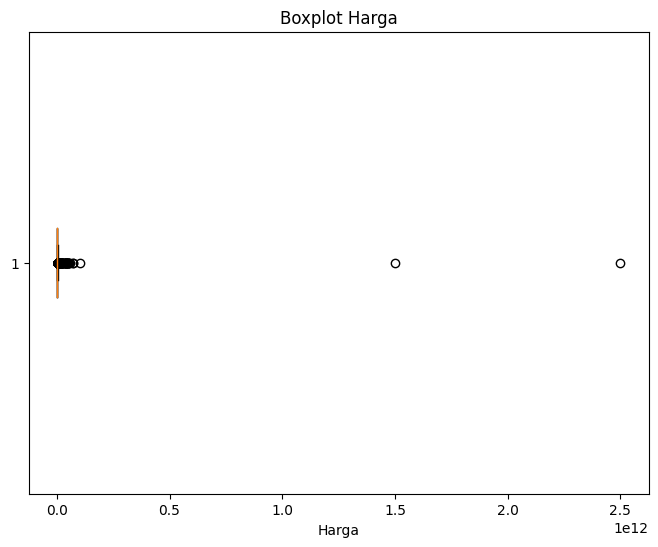

In [ ]:
# boxplot dari kolom harga
plt.figure(figsize=(8, 6))
plt.boxplot(df['harga'], vert=False)
plt.xlabel('Harga')  #sumbu x
plt.title('Boxplot Harga')  #judul plot
plt.show()

Berdasarkan visualisasi diatas, terdapat 2 outlier pada harga. Maka, 2 data yang terdapat outlier tersebut akan dicek.

In [ ]:
df.loc[df['harga'] > 1e12] #cek outlier pada harga

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
2133,Medan,2021-06-12,145.0,126.0,3.0,3.0,0.0,1.0,Medan Johor,SHM,2200.0,1.500000e+12,https://www.rumah.com/listing-properti/dijual-...,Rumah berkualitas samera
2717,Bali,2023-08-07,250.0,436.0,5.0,3.0,0.0,0.0,Semarapura,SHM,6600.0,2.500000e+12,https://www.rumah123.com/properti/semarapura/h...,"Rumah Dijual Semarapura Ada 2 sertifikat, masi..."


Perhatikan bahwa pada entri 2717, karena masih baru (tahun 2023) dapat dikunjungi url link rumahnya, dan didapatkan harusnya rumah tersebut bernilai 2.5 Miliar, bukan 2.5 triliun seperti yang ditampilkan pada data, oleh karena itu data ini perlu dirubah. Namun, untuk data entri 2133, kita tidak dapat meng-*crosscheck* harganya dikarenakan link url yang sudah kadaluarsa. Maka, akan dilakukan penghapusan pada entri 2133 tersebut.


In [ ]:
df.loc[2717,"harga"]= 2500000000 #ubah entri 2717

In [ ]:
df.drop(df[df['harga'] > 1e12].index, inplace = True) #hapus entri 2133
df.loc[df['harga'] > 1e12] #cek kembali

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi


Berdasarkan observasi data, masih banyak harga yang belum setara. Contohnya, terdapat harga dibawah Rp1.000.000, yang mana seharusnya harga rumah berada di kisaran lebih dari ratusan juta.

In [ ]:
df.loc[df['harga'] < 1000000] #cek harga dibawah 1 juta

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
892,Depok,2021-06-12,165.0,200.0,4.0,2.0,0.0,1.0,Sukmajaya,SHM,2200.0,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
893,Depok,2021-06-12,50.0,45.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
894,Depok,2021-06-12,50.0,36.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
895,Depok,2021-06-12,50.0,45.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
896,Depok,2021-06-12,72.0,45.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Tangerang,2023-09-21,216.0,200.0,4.0,4.0,1.0,2.0,Gading Serpong,SHM,4400.0,170.0,https://www.rumah.com/listing-properti/dijual-...,Cluster San Lorenzo Illago 2 lantai Lt 216 (12...
1307,Tangerang,2023-09-21,84.0,137.0,5.0,4.0,1.0,1.0,"BSD, TANGERANG",SHM,2200.0,2993.0,https://www.rumah.com/listing-properti/dijual-...,Tipe 7 x 12 Kpr Tanpa Dp. 2 Lantai Roof Top Fu...
1308,Tangerang,2023-09-21,75.0,68.0,3.0,3.0,1.0,1.0,Lippo Karawaci,SHM,2200.0,1088.0,https://www.olx.co.id/item/rumah-2-lantai-stra...,Cendana Arbory merupakan cluster ke-19 dari se...
1309,Tangerang,2023-09-21,80.0,75.0,2.0,2.0,1.0,1.0,Karang Tengah,SHM,2200.0,1385.0,https://www.olx.co.id/item/rumah-baru-karang-t...,Rumah Cluster Karang Tengah (Raden Saleh) Ruma...


Terdapat 277 entri, maka akan dilakukan perkalian dengan 1 juta untuk semua harga rumah yang berada dibawah 1 juta (karena harga sebelumnya di kisaran 100 - 5000, jika dikali 1 juta, maka harga yang terendah menjadi 100 juta dan tertinggi 5 M dimana masuk akal untuk harga sebuah rumah), setelah melakukan crosscheck dengan url link harga rumah sebenarnya ternyata cara ini valid.

In [ ]:
df['harga'] = np.where(df['harga'] < 1000000, df['harga']*1000000, df['harga'])
df.loc[df['harga'] < 1000000] #cek kembali

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi


Selanjutnya cek untuk harga dikisaran 1 juta sampai 30 juta, karena masih sangat tidak mungkin mendapatkan rumah dengan kisaran harga seperti itu.

In [ ]:
df.loc[(df['harga'] > 1000000) & (df['harga'] < 30000000)] #cek harga diatas 1 juta dan dibawah 30 juta

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
1494,Jakarta,2023-09-19,85.0,150.0,3.0,3.0,1.0,0.0,Jakarta Selatan,SHM,2200.0,2200000.0,https://www.rumah.com/listing-properti/dijual-...,Dijual rumah di JL Kebon Baru dekat Asem Baris...
1495,Jakarta,2023-09-19,90.0,210.0,5.0,4.0,1.0,0.0,Jakarta Selatan,SHM,2200.0,3500000.0,https://www.rumah.com/listing-properti/dijual-...,Spesifikasi
1496,Jakarta,2023-09-19,240.0,302.0,4.0,3.0,1.0,0.0,Jakarta Barat,SHM,4400.0,6500000.0,https://www.rumah.com/listing-properti/dijual-...,Rumah layak huni dengan lantai marmer dan tang...
1497,Jakarta,2023-09-19,129.0,100.0,3.0,2.0,0.0,1.0,Jakarta Selatan,SHM,3500.0,3300000.0,https://www.rumah.com/listing-properti/dijual-...,Rumah mungil siap huni lokasi strategis di dal...
1498,Jakarta,2023-09-19,601.0,325.0,6.0,5.0,2.0,2.0,Jakarta Pusat,SHGB,2200.0,12500000.0,https://www.rumah.com/listing-properti/dijual-...,"Di Jalan Utama, Cocok Untuk Bisnis Anda\n- Bud..."
1499,Jakarta,2023-09-19,102.0,260.0,5.0,5.0,1.0,1.0,Jakarta Utara,SHM,5500.0,5500000.0,https://www.rumah.com/listing-properti/dijual-...,# Dijual Rumah Brand New#\nDi Kompleks Ok\n
1500,Jakarta,2023-09-19,380.0,550.0,5.0,5.0,0.0,3.0,Jakarta Selatan,SHM,16000.0,6900000.0,https://www.rumah.com/listing-properti/dijual-...,For sale rumah tropical villa style cirendeu d...
1501,Jakarta,2023-09-19,350.0,438.0,5.0,5.0,0.0,2.0,Jakarta Utara,HP,4400.0,16500000.0,https://www.rumah.com/listing-properti/dijual-...,*Rumah PIK Golf Island*


Ternyata benar setelah dicek harga aslinya melalu urlnya, terdapat kesalahan pada harga dimana harga seharusnya perlu dikali 1000.

In [ ]:
df['harga'] = np.where((df['harga'] > 1000000) & (df['harga'] < 30000000), df['harga']*1000, df['harga'])
df.loc[(df['harga'] > 1000000) & (df['harga'] < 30000000)] #cek kembali

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi


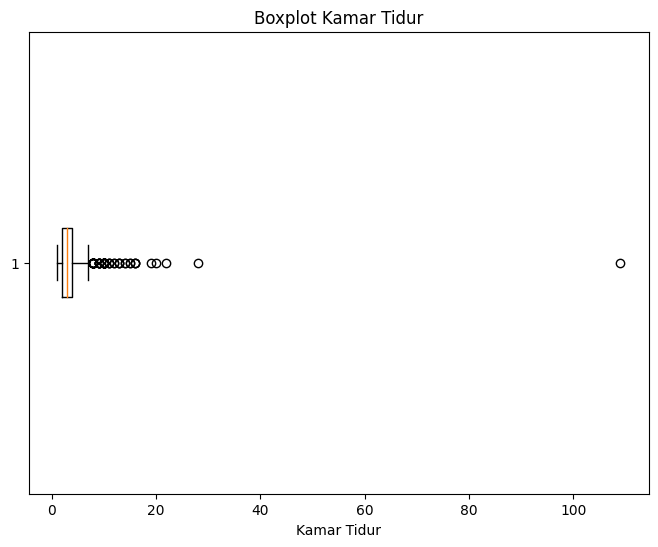

In [ ]:
# boxplot dari kolom KT (analog dengan KM)
plt.figure(figsize=(8, 6))
plt.boxplot(df['KT'], vert=False)
plt.xlabel('Kamar Tidur')  #sumbu x
plt.title('Boxplot Kamar Tidur')  #judul plot
plt.show()

In [ ]:
df.loc[df['KT'] > 100] #cek KT diatas 100

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
298,Lampung - Sumatera selatan,2021-05-12,1716.0,1871.0,109.0,106.0,0.0,0.0,"Rajabasa, Bandar Lampung",SHM,2722.929441,1.100000e+10,https://rumahdijual.com/lampung/9635319-kost-m...,FASILITAS KAMAR:\n1. Kmr lebih Besar 4x4 dg Sp...


Entri ini dibiarkan karena mungkin propertinya memang ditujukan untuk kos-kosan yang memiliki kamar banyak. Selain itu, luasnya juga cukup besar.

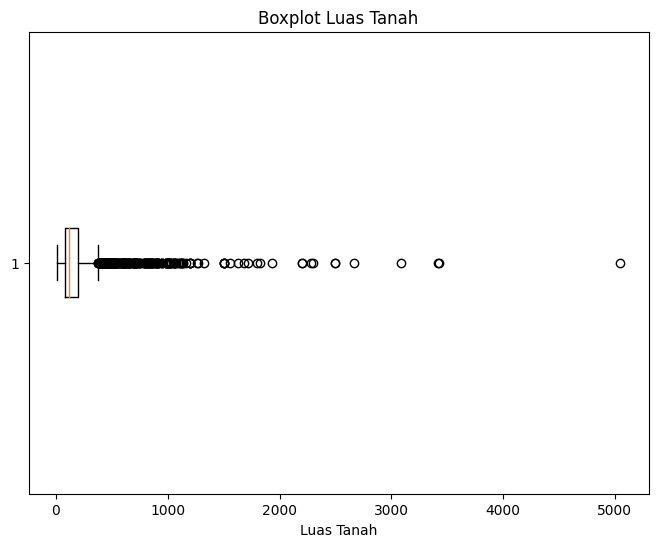

In [ ]:
# boxplot dari kolom LT
plt.figure(figsize=(8, 6))
plt.boxplot(df['LT'], vert=False)
plt.xlabel('Luas Tanah')  #sumbu x
plt.title('Boxplot Luas Tanah')  #judul plot
plt.show()

In [ ]:
df.loc[df['LT'] > 5000] #cek LT diatas 5000

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
2703,Bali,2023-07-30,5050.0,100.0,3.0,3.0,0.0,3.0,Bangli,SHM,2200.0,5.000000e+09,https://www.rumah.com/listing-properti/dijual-...,AGROWISATA KEBUN STRAWBERY KINTAMANI\n\nSpesif...


Karena merupakan properti kebun, maka tidak aneh jika memiliki Luas Tanah yang sangat besar. Jika dilihat dari Luas Bangunan dan lain-lainnya juga masih wajar.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 0 to 3083
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   wilayah     3049 non-null   category      
 1   created_at  3049 non-null   datetime64[ns]
 2   LT          3049 non-null   float64       
 3   LB          3049 non-null   float64       
 4   KT          3049 non-null   float64       
 5   KM          3049 non-null   float64       
 6   garasi      3049 non-null   float64       
 7   carport     3049 non-null   float64       
 8   lokasi      3049 non-null   object        
 9   sertifikat  3049 non-null   category      
 10  listrik     3049 non-null   float64       
 11  harga       3049 non-null   float64       
 12  url         3048 non-null   object        
 13  deskripsi   3026 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(8), object(3)
memory usage: 316.9+ KB


Setelah dilakukan tahapan preprocessing data dapat di-*save* untuk dilanjutkan ke tahapan selanjutnya.

In [ ]:
df.to_csv('data rumah_afterprepro.csv', index=False, encoding='utf-8') #save data setelah pre-processing

## **1. Kualitas data yang dimiliki perusahaan**
Berdasarkan hasil pre-processing pada data ini, diperoleh beberapa insights terkait kualitas data sebagai berikut:
*   Kelengkapan: Data yang disediakan oleh RPPI memiliki banyak missing values di masing-masing baris dan kolom, khususnya di kolom hadap, carport, dan garasi. Selain itu, terdapat entri yang sebenarnya merupakan missing values, tetapi tidak terdeteksi sebagai missing values, seperti entri '-'. Hal ini menyulitkan kami dalam menganalisis data serta memerlukan banyak waktu untuk membersihkan dan merapikan data.
*   Relevansi: Terdapat beberapa kolom yang tidak mempunyai relevansi cukup kuat dalam penarikan keputusan, yaitu kolom url dan deskripsi.
*   Realibilitas: Realibilitas pada data ini sudah cukup baik. Namun, terdapat sedikit duplikasi, noise, dan outlier pada data. Data yang terduplikat kami hapus, sedangkan data dengan noise dan outlier kami teliti lebih lanjut apakah data tersebut sesuai untuk dipakai dalam analisis.
*   *Inconsistent* data: Data memiliki banyak entri yang tidak konsisten. Contohnya adalah penggunaan huruf besar/kecil. Terdapat entri dengan huruf kecil semua, tetapi ada yang menggunakan huruf kapital di depan kata. Kemudian, terdapat entri yang harusnya numerik, tetapi ada yang menambahkan kata, seperti satuan dari variabel tersebut. Maka, hal-hal seperti ini memerlukan perhatian khusus untuk ditangani selama proses pre-processing.
*  Validitas data : Masih terdapat beberapa kesalahan penginputan data, sehingga datanya belum sepenuhnya valid, karena data yang diinput berbeda dengan data sebenarnya yang dicheck dari urlnya langsung. Kemudian terdapat data yang inkonsisten pada tanggal dimana ada yang menggunakan format dd/mm/yyyy dan ada juga yang sebaliknya mm/dd/yyyy, hal ini menyebabkan data tidak dan valid dan sulit untuk memperbaikinya, karena perlu diteliti secara satu-satu.


## **2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.**
Setelah dilakukan analisis pada data, kami mendapat beberapa saran untuk perbaikan data yang disediakan oleh RPPI sebagai berikut:
*   Sebaiknya DE/DBA perusahaan lebih memperhatikan lagi terkait input yang dimasukkan ke dalam data supaya datanya lebih konsisten dan tidak berantakan, terutama pada penggunaan huruf besar/kecil, penamaan kurang konsisten (ada tidaknya satuan pada data), tanggal yang tertukar (bulan dan hari), dan lain-lain. Akan lebih baik lagi untuk membuat sistem supaya data yang terinput akan seragam dan rapih.
*   DE/DBA perusahaan harus lebih teliti lagi dalam penginputan data karena masih didapatkan ada beberapa nilai yang tidak sesuai dengan nilai aslinya setelah di lakukan crosscheck dengan data yang didapat dari link url.
*  Sebaiknya dipertimbangkan untuk memberikan penambahan pengukuran lain yang mungkin penting dalam penilaian sebuah properti. Contohnya seperti jarak dengan halte/stasiun terdekat,  jarak dengan fasilitas umum seperti rumah sakit, minimarket, pasar, sekolah dan lain-lain.
*   RPPI sebaiknya melakukan pembaruan data pada properti karena database RPPI belum memberikan informasi mengenai sudah/belum terjualnya suatu properti. Selain itu, RPPI dapat menambahkan mekanisme untuk menghitung berapa lama suatu properti telah terdaftar di pasaran.
*   Untuk menghindari missing values, DE/DBA perusahaan dapat lebih bijak dalam mengisi missing values. Misalnya, ketika suatu properti tidak memiliki garasi atau carport, rekomendasi yang bijak adalah dengan mengisi nilai yang tidak ada dengan angka 0.
*   Pendeskripsian properti tidak selalu bisa dijelaskan dengan format yang seragam. Namun, untuk memaksimalkan insights yang bisa diperoleh, akan lebih baik jika diberikan instruksi dalam pengisian kolom deskripsi. Misalnya, memberikan instruksi dalam pengisian deskripsi, seperti "Berikan deskripsi rumah secara berurutan dari a ke b ke c dan seterusnya". Hal ini akan menghasilkan kerapian dan konsistensi dalam database, meskipun informasi yang diperoleh mungkin beragam.







In [ ]:
data = pd.read_csv ('data rumah_afterprepro.csv') #panggil data setelah preprocessing

# **VISUALISASI**


## **3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?**

<ipython-input-59-c0953c317c8d>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  price = sns.catplot(data=data, x='harga',y='wilayah', kind = 'strip', palette = 'muted')


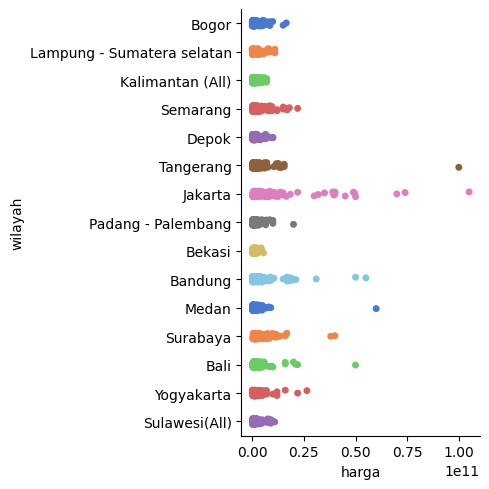

In [ ]:
# melihat sebaran harga penjualan di tiap wilayah
price = sns.catplot(data=data, x='harga',y='wilayah', kind = 'strip', palette = 'muted')

Dari visualisasi di atas, dapat dilihat bahwa data memiliki range nilai yang hampir sama, tetapi terdapat beberapa properti yang di jual di **wilayah Jakarta yang memiliki harga relatif lebih mahal** dari wilayah-wilayah lainnya. Sedangkan pada **wilayah Bekasi, dapat dilihat bahwa semua harga propertinya relatif lebih murah** dan tidak terdapat data yang jauh (outlier) lebih tinggi harganya. Selanjutnya, akan dilihat lebih dalam mengenai Jakarta bagian mana yang mempunyai harga rumah tinggi.

In [ ]:
# akan dilihat wilayah jakarta bagian mana yang mempunyai harga lebih tinggi
Jakarta = df[df['wilayah'] == 'Jakarta'] # mengambil data wilayah Jakarta

# mendefinisikan ulang lokasi menjadi wilayah di jakarta
def definisi_ulang(lokasi):
    if 'Jakarta Pusat' in lokasi:
        return 'Jakarta Pusat'
    elif 'Jakarta Utara' in lokasi:
        return 'Jakarta Utara'
    elif 'Jakarta Timur' in lokasi:
        return 'Jakarta Timur'
    elif 'Jakarta Selatan' in lokasi:
        return 'Jakarta Selatan'
    elif 'Jakarta Barat' in lokasi:
        return 'Jakarta Barat'
    else:
        return lokasi

# membuat kolom baru "lokasi_baru" dengan penulisan yang didefinisikan ulang
Jakarta['lokasi_baru'] = Jakarta['lokasi'].apply(lambda x: definisi_ulang(x))

Jakarta.head()

<ipython-input-60-cd751c100fcc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jakarta['lokasi_baru'] = Jakarta['lokasi'].apply(lambda x: definisi_ulang(x))


,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi,lokasi_baru
1311,Jakarta,2021-12-06,202.0,198.0,8.0,3.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta Pusat
1312,Jakarta,2021-12-02,30.0,55.0,2.0,1.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta Pusat
1313,Jakarta,2021-12-06,19.0,35.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta Pusat
1314,Jakarta,2021-12-06,33.0,42.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta Pusat
1315,Jakarta,2021-12-06,30.0,55.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta Pusat


<ipython-input-61-91d55defdb3a>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data = Jakarta, x='harga', y='lokasi_baru', kind = 'strip', palette = 'muted')


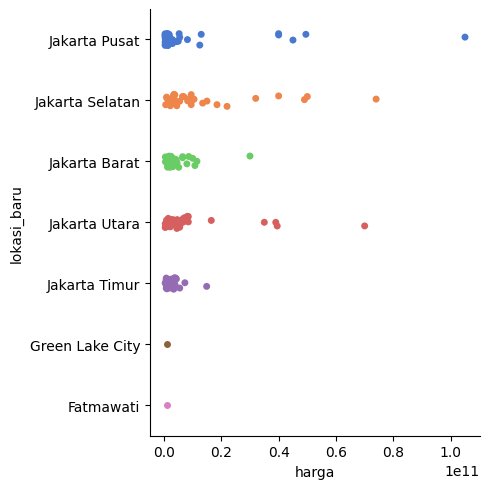

In [ ]:
# melihat sebaran harga di tiap wilayah jakarta
sns.catplot(data = Jakarta, x='harga', y='lokasi_baru', kind = 'strip', palette = 'muted')

Dari visualisasi di atas dapat dilihat bahwa beberapa harga yang tinggi berada di wilayah **Jakarta Pusat, Jakarta Selatan, dan Jakarta Utara**.

## **Kesimpulan**:
Data memiliki range nilai yang hampir sama, tetapi terdapat beberapa properti yang di jual di wilayah **Jakarta** yang memiliki harga relatif lebih mahal dari wilayah-wilayah lainnya. Sedangkan pada wilayah **Bekasi**, dapat dilihat bahwa semua harga propertinya relatif murah dan tidak terdapat data yang jauh (outlier) lebih tinggi harganya.

## **4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).**

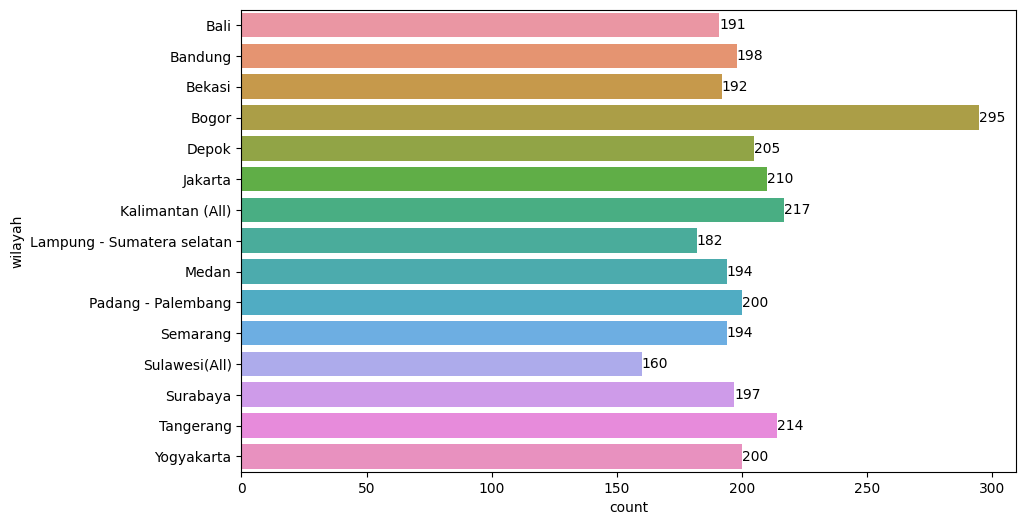

In [ ]:
# melihat jumlah penjualan properti di tiap wilayah
plt.figure(figsize=(10,6))

price = sns.countplot(y='wilayah', data=df)
for label in price.containers:
    price.bar_label(label)
plt.show()

Dari visualisasi di atas, dapat dilihat bahwa tiga wilayah dengan penjualan properti terbanyak adalah **Bogor, Kalimantan, dan Tangerang**. Ketiga wilayah ini dapat dipertimbangkan oleh RPPI untuk membuka cabang selanjutnya karena daerah-daerah tersebut memiliki penjualan terbanyak sehingga ada peluang bagi RPPI untuk mengembangkan bisnisnya di wilayah tersebut. Namun, jumlah penjualan saja tidak cukup untuk menentukan pembukaan cabang baru. Maka, kami akan coba melihat jumlah dan rata-rata penjualan di tiap wilayah pada data.

In [ ]:
# jumlah penjualan di tiap wilayah
sum_all = df.groupby('wilayah')['harga'].sum().reset_index()

# rata-rata penjualan di tiap wilayah
mean_all = df.groupby('wilayah')['harga'].mean().reset_index()

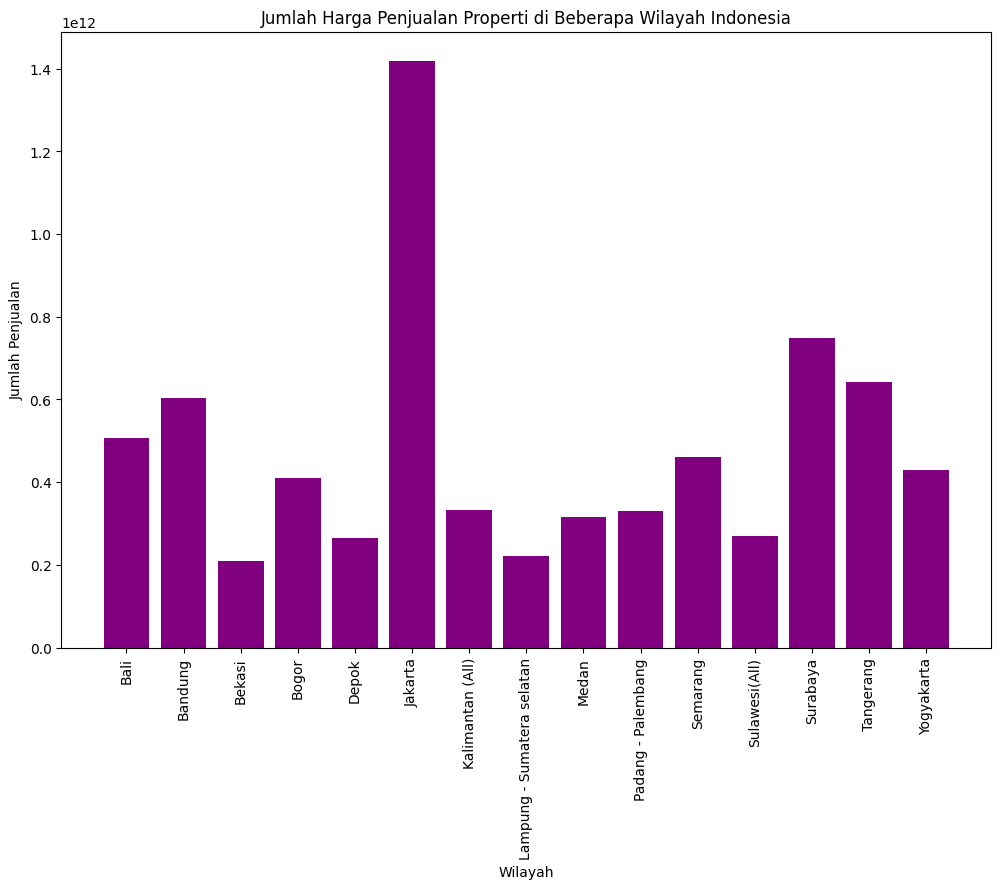

In [ ]:
# visualisasi jumlah harga penjualan di beberapa wilayah
plt.figure(figsize=(12,8))

plt.bar(sum_all['wilayah'], sum_all['harga'], color = 'purple')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Penjualan')
plt.title('Jumlah Harga Penjualan Properti di Beberapa Wilayah Indonesia')
plt.xticks(rotation=90)

plt.show()

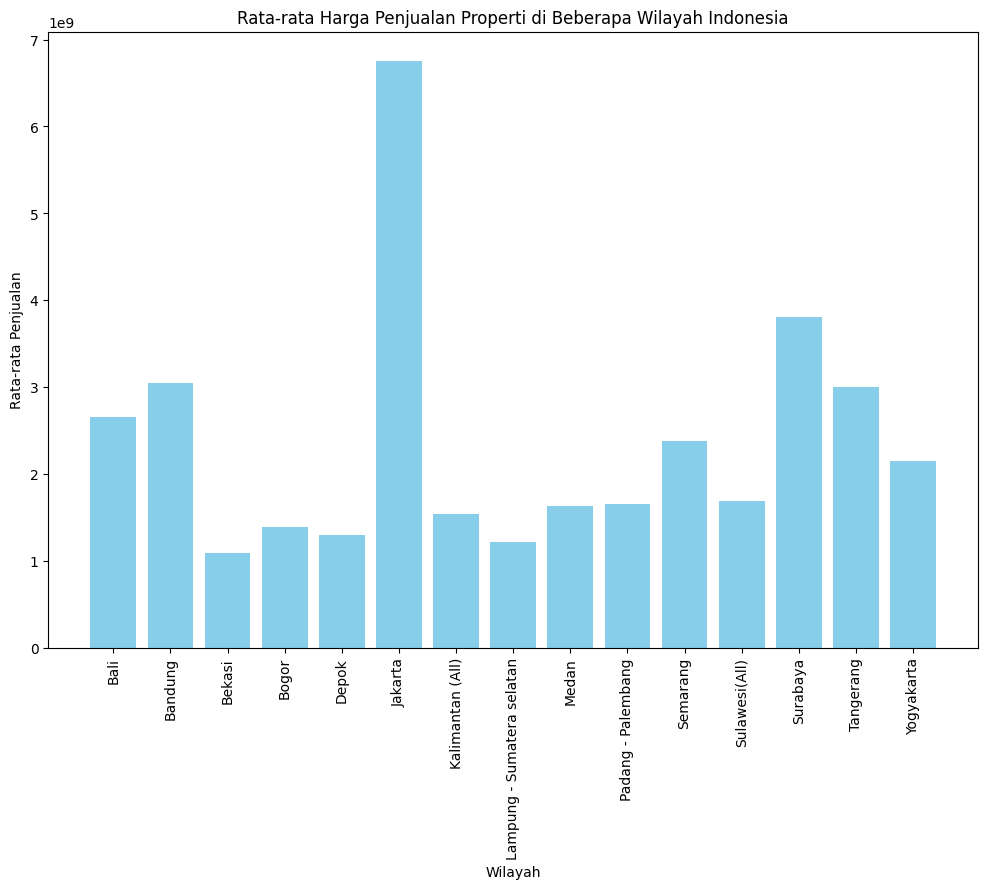

In [ ]:
# visualisasi rata-rata harga penjualan di beberapa wilayah
plt.figure(figsize=(12,8))

plt.bar(mean_all['wilayah'], mean_all['harga'], color = 'skyblue')
plt.xlabel('Wilayah')
plt.ylabel('Rata-rata Penjualan')
plt.title('Rata-rata Harga Penjualan Properti di Beberapa Wilayah Indonesia')
plt.xticks(rotation=90)

plt.show()

Dari kedua visualisasi di atas, dapat dilihat bahwa jumlah dan rata-rata penjualan properti tertinggi ada di wilayah Jakarta. Hal ini cukup sejalan dengan visualisasi pada pertanyaan 3 yang menggambarkan bahwa wilayah Jakarta ini mempunyai sebaran harga properti yang cukup tinggi dibandingkan wilayah lainnya. **Wilayah Jakarta juga dapat menjadi pertimbangan RPPI untuk membuka cabang barunya karena total penjualan yang besar tentu akan menguntungkan dan mengembangkan bisnis lebih besar**. Selanjutnya, akan dilihat terlebih dahulu tren rata-rata penjualan tiap bulan untuk wilayah Bogor dan Jakarta.

In [ ]:
# mencari rata-rata penjualan per bulan di Bogor
Bogor = df[df['wilayah'] == 'Bogor'] # mengambil data wilayah Bogor
Bogor['Bulan_Tahun'] = Bogor['created_at'].dt.strftime('%Y-%m') # agar data berdasarkan tahun dan bulan
mean_bgr = Bogor.groupby('Bulan_Tahun')['harga'].mean().reset_index()

# mencari rata-rata penjualan per bulan di Jakarta
Jakarta = df[df['wilayah'] == 'Jakarta'] # mengambil data wilayah Jakarta
Jakarta['Bulan_Tahun'] = Jakarta['created_at'].dt.strftime('%Y-%m') # agar data berdasarkan tahun dan bulan
mean_jkt = Jakarta.groupby('Bulan_Tahun')['harga'].mean().reset_index()

<ipython-input-66-c026dfbbfee0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bogor['Bulan_Tahun'] = Bogor['created_at'].dt.strftime('%Y-%m') # agar data berdasarkan tahun dan bulan
<ipython-input-66-c026dfbbfee0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jakarta['Bulan_Tahun'] = Jakarta['created_at'].dt.strftime('%Y-%m') # agar data berdasarkan tahun dan bulan


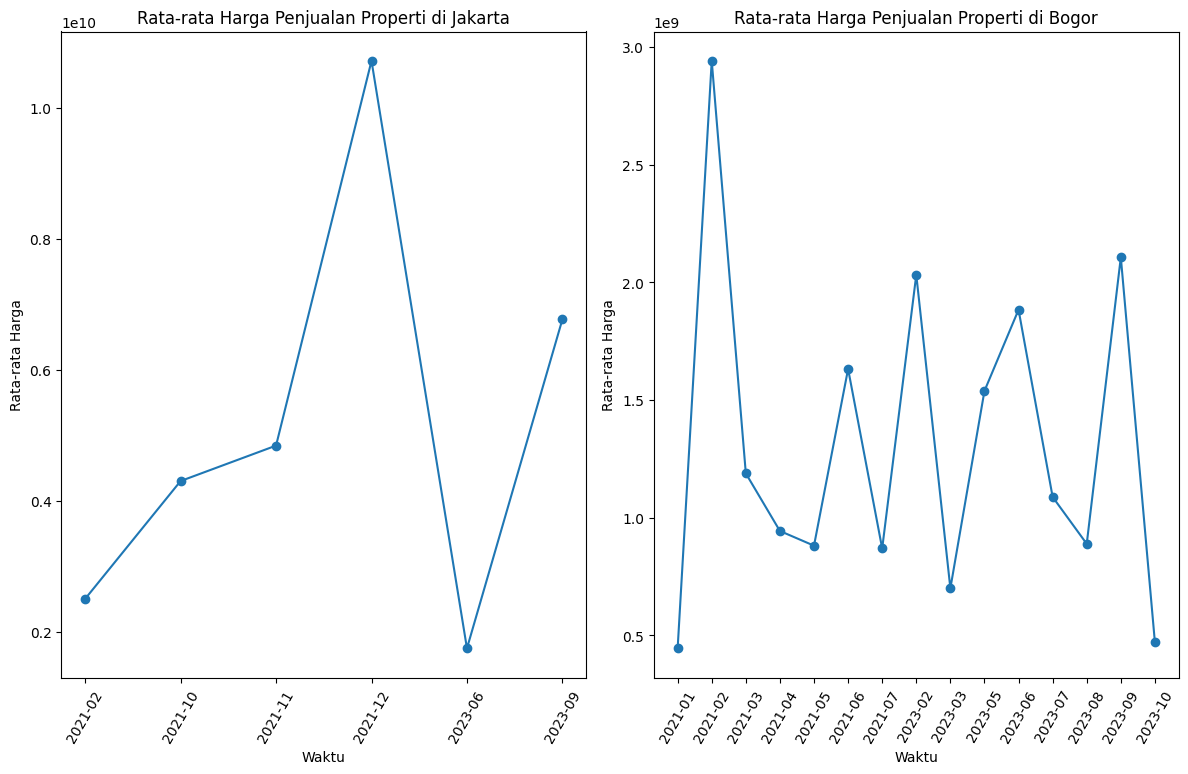

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.plot(mean_jkt['Bulan_Tahun'], mean_jkt['harga'], marker = 'o')
plt.xlabel('Waktu')
plt.ylabel('Rata-rata Harga')
plt.title('Rata-rata Harga Penjualan Properti di Jakarta')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
plt.plot(mean_bgr['Bulan_Tahun'], mean_bgr['harga'], marker = 'o')
plt.xlabel('Waktu')
plt.ylabel('Rata-rata Harga')
plt.title('Rata-rata Harga Penjualan Properti di Bogor')
plt.xticks(rotation=60)


plt.tight_layout()
plt.show()

## **Kesimpulan:**
Karena keterbatasan data, visualisasi hanya dapat dilakukan berdasarkan bulan dan tahun yang tersedia. Selain itu, karena data yang kurang konsisten dalam penulisan tanggal, terdapat data untuk bulan Oktober 2023 yang seharusnya belum ada. Sehingga kita akan memperhatikan visualisasi sampai bulan September 2023 saja. Dari visualisasi tersebut dapat dilihat bahwa untuk bulan terakhir, kedua wilayah memiliki kenaikan/peningkatan rata-rata penjualan yang menggambarkan hal positif. Oleh karena itu, kami menyarankan RPPI untuk mempertimbangkan pembukaan cabang baru di wilayah **Bogor atau Jakarta**.

##**5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?**

####**Harga**

<Axes: xlabel='harga', ylabel='Count'>

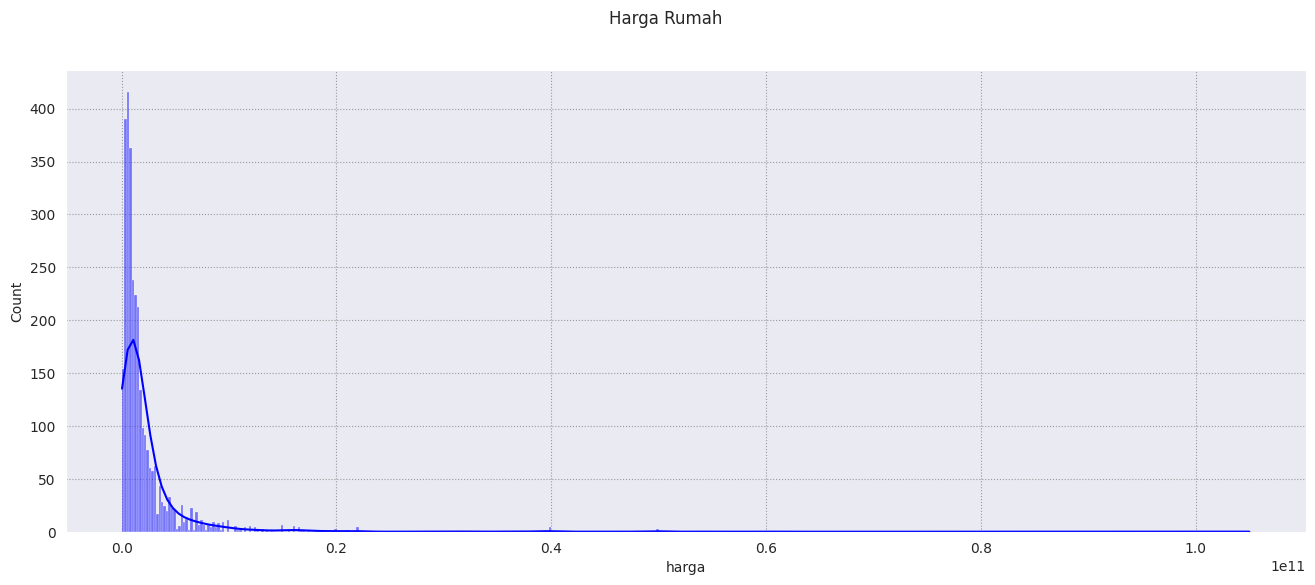

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig,axs = plt.subplots(1,1, figsize = (16,6))
fig.suptitle('Harga Rumah')
sns.histplot(data=df, x="harga", kde=True, color="blue")


####terlihat dari visualisasi, bahwa rumah yang paling banyak dijual berada di range harga Rp. 100.000.000,00 sampai Rp.500.000.000,00

####**Luas Tanah dan Luas Bangunan**

<Axes: xlabel='LB', ylabel='Count'>

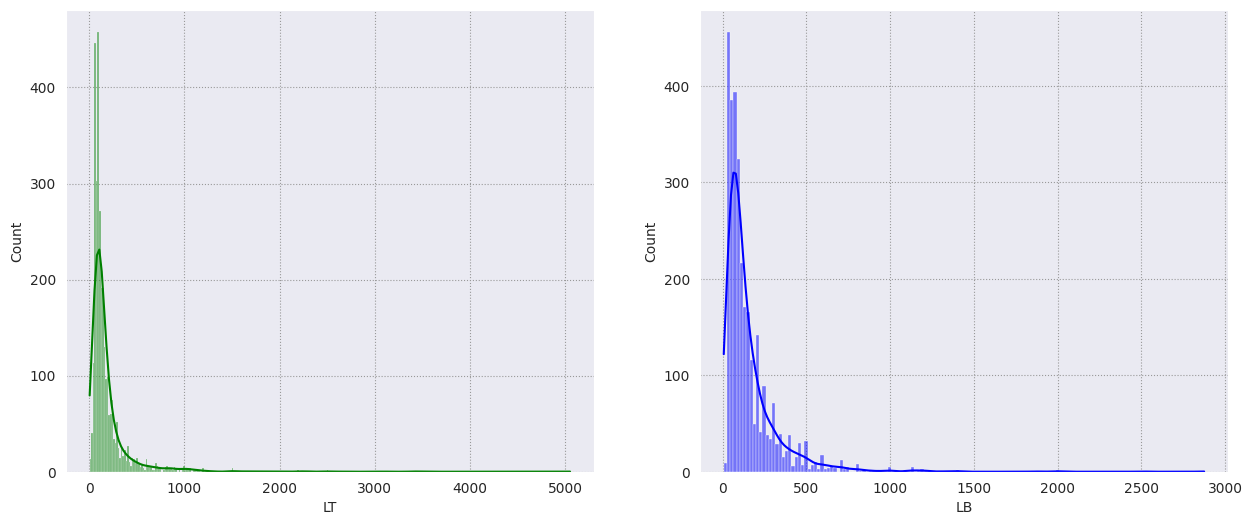

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig,axs = plt.subplots(1,2, figsize = (15,6))
fig.suptitle('')
sns.histplot(data=df, x="LT", kde=True, color="green", ax =axs[0])
sns.histplot(data=df, x="LB", kde=True, color="blue", ax=axs[1])

####terlihat dari visualisasi yang ada, rumah yang paling banyak dijual punya luas tanah pada range 100-200 *meters squared* dan punya luas bangunan padan range 100-200 *meters squared*

####**Garasi dan Carport**

<Axes: xlabel='carport', ylabel='Count'>

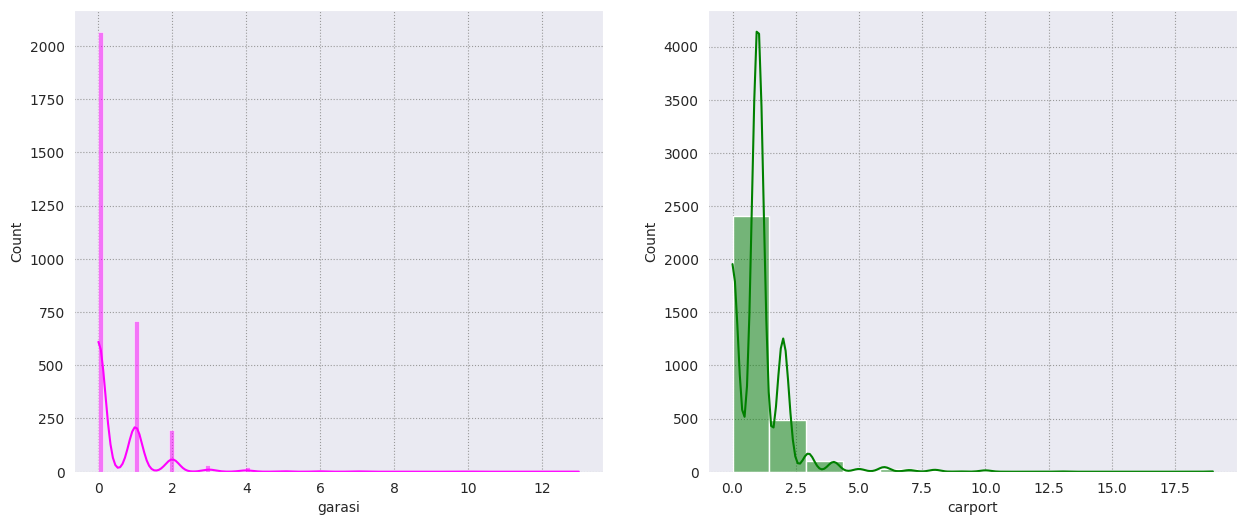

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig,axs = plt.subplots(1,2, figsize = (15,6))
fig.suptitle('')
sns.histplot(data=df, x="garasi", kde=True, color="magenta", ax =axs[0])
sns.histplot(data=df, x="carport", kde=True, color="green", ax=axs[1])

####terlihat bahwa kebanyakan rumah yang dijual tidak punya garasi namun punya carport untuk 1-2 mobil

####**Jumlah Kamar Tidur dan Kamar Mandi**

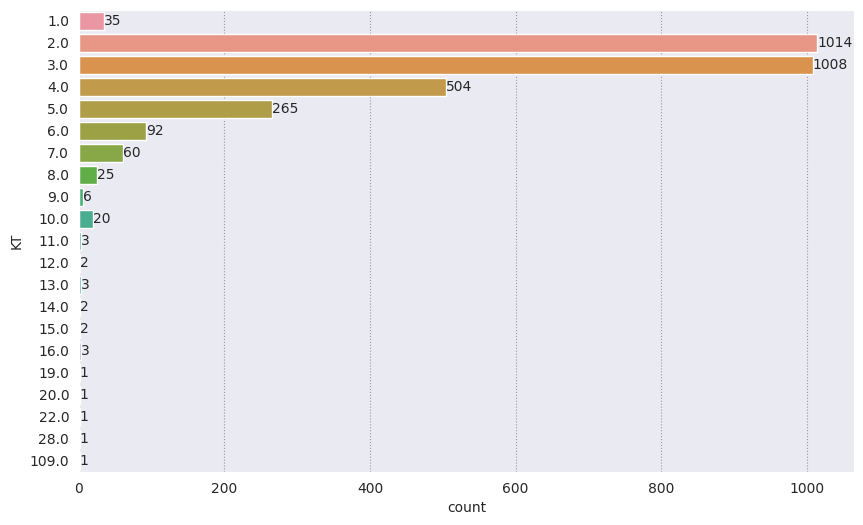

In [ ]:
plt.figure(figsize=(10,6))

bed = sns.countplot(y='KT', data=df)
for label in bed.containers:
    bed.bar_label(label)
plt.show()


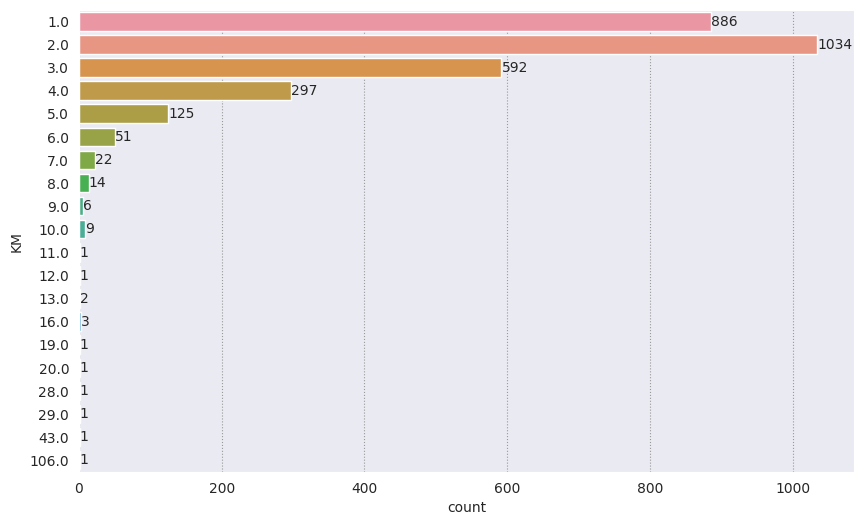

In [ ]:
plt.figure(figsize=(10,6))

bath = sns.countplot(y='KM', data=df)
for label in bath.containers:
    bath.bar_label(label)
plt.show()

####terlihat bahwa rumah yang paling banyak dijual adalah rumah dengan kamar tidur berjumlah 2-3, dengan kamar mandi berjumlah 1-2

###**Sertifikat**

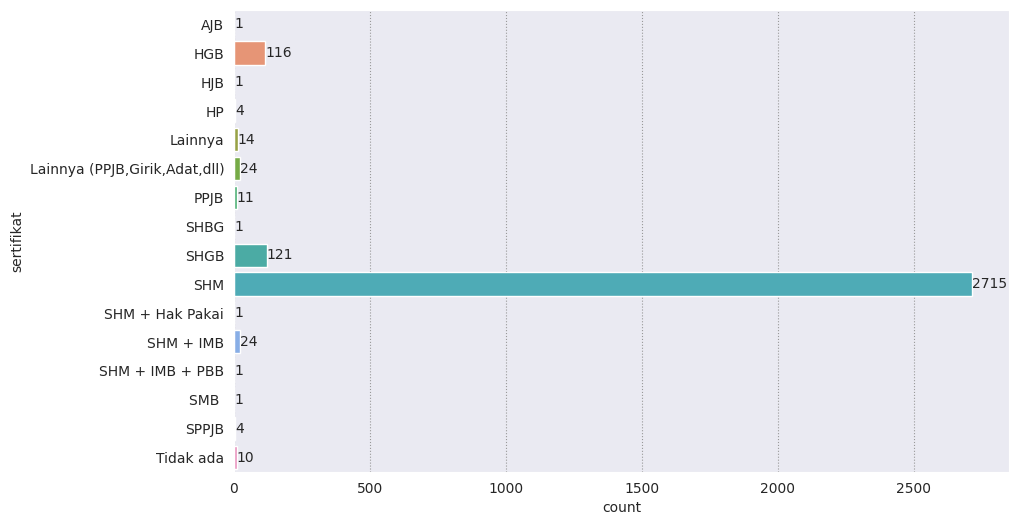

In [ ]:
plt.figure(figsize=(10,6))

sertif = sns.countplot(y='sertifikat', data=df)
for label in sertif.containers:
    sertif.bar_label(label)
plt.show()

####terlihat bahwa kebanyakan rumah dijual dengan sertfikat SHM (Surat Hak Milik)

## **Kesimpulan**:
Kebanyakan rumah yang dijual punya karakteristik harga dari range harga Rp. 100.000.000,00 sampai Rp.500.000.000,00 dengan luas tanah dan luas bangunan berkisar antara 100-200 *meters squared*, dengan kapasitas carport 1-2 namun tidak punya garasi. Selain itu mayoritas jumlah kamar tidur pada rumah yang dijual adalah 2-3 kamar dan jumlah kamar mandi adalah 1-2

#**6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?**

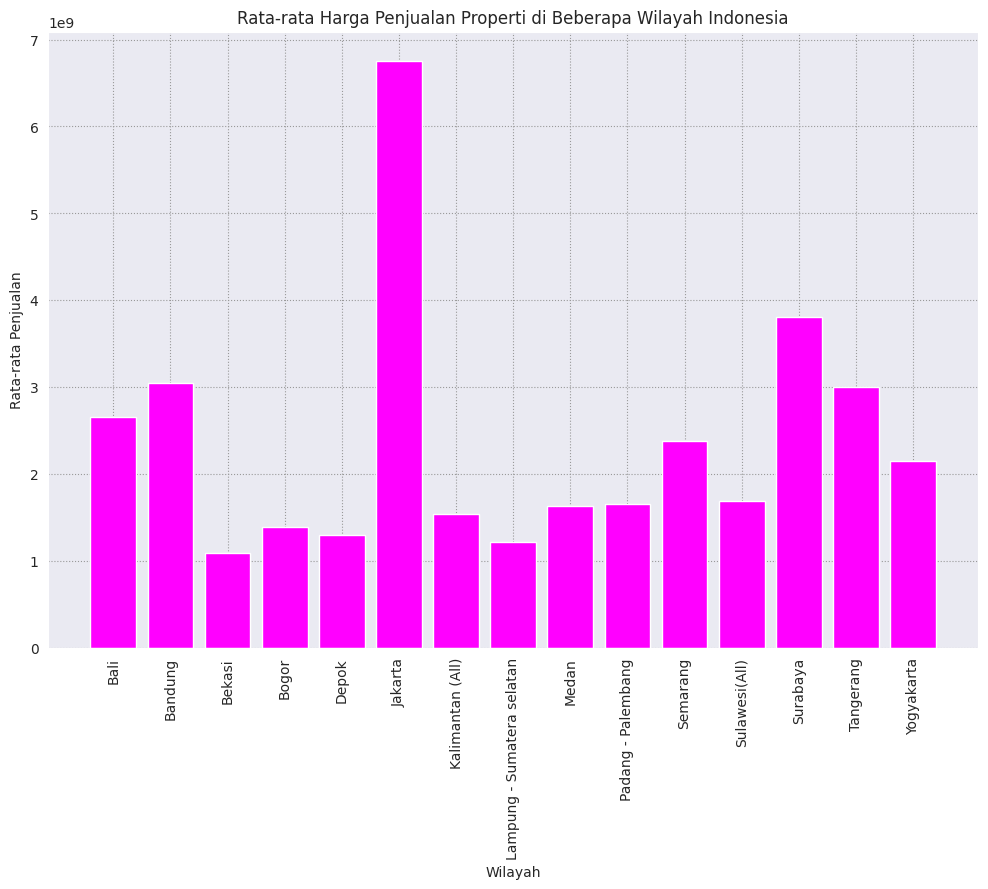

In [ ]:
#akan dilihat terlebih dahulu rata -rata harga  rumah di tiap daerah
plt.figure(figsize=(12,8))

plt.bar(mean_all['wilayah'], mean_all['harga'], color = 'magenta')
plt.xlabel('Wilayah')
plt.ylabel('Rata-rata Penjualan')
plt.title('Rata-rata Harga Penjualan Properti di Beberapa Wilayah Indonesia')
plt.xticks(rotation=90)

plt.show()

Dapat dilihat bahwa rumah dengan rata-rata tertinggi adalah **Jakarta**, dan karena alasan itulah investasi yang paling bagus dilakukan adalah di wilayah Jakarta sehingga akan dianalisis secara mendalam mengenai property di Jakarta.

In [ ]:
#dari daerah Jakarta akan dilihat harga-harga rumah yang dibawah rata-rata beserta karakteristiknya
Jakarta = df[df['wilayah'] == 'Jakarta'] # mengambil data wilayah Jakarta


<Axes: xlabel='harga', ylabel='Count'>

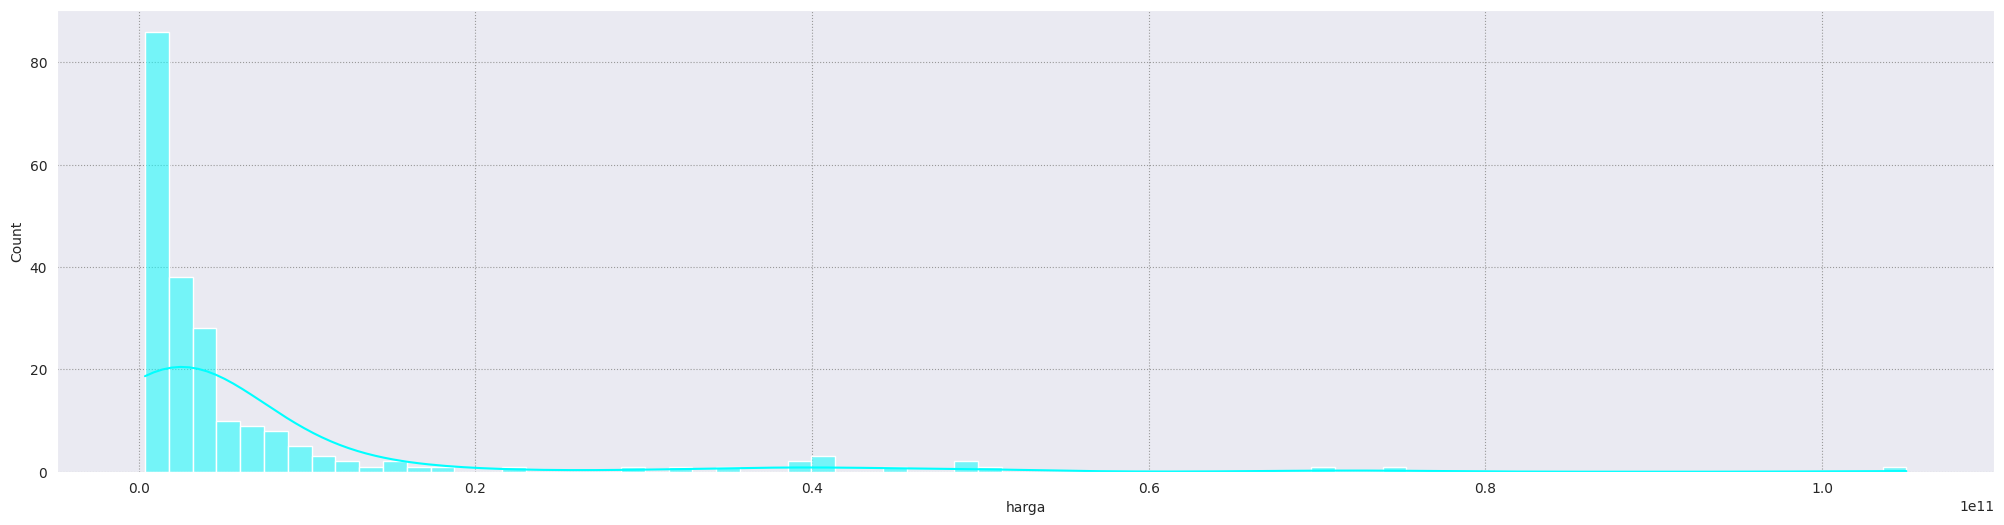

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig,axs = plt.subplots(1,1, figsize = (25,6))
sns.histplot(data=Jakarta, x="harga", kde=True, color="cyan")



In [ ]:
#akan dilihat karakteristik harga harga yang dibawah rata-rata
df1 =pd.DataFrame(Jakarta)


In [ ]:
mean_jkt = df1['harga'].mean()


In [ ]:
df2 =df1[df1['harga'] < 6754488343.109524]

In [ ]:
df2

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
1311,Jakarta,2021-12-06,202.0,198.0,8.0,3.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1312,Jakarta,2021-12-02,30.0,55.0,2.0,1.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
1313,Jakarta,2021-12-06,19.0,35.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
1314,Jakarta,2021-12-06,33.0,42.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
1315,Jakarta,2021-12-06,30.0,55.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,Jakarta,2023-09-21,140.0,250.0,4.0,3.0,0.0,1.0,Jakarta Barat,SHM,5500.0,4.500000e+09,https://www.rumah123.com/properti/jakarta-bara...,"Dijual rumah di Puri Indah, Jakarta Barat.\nRu..."
1515,Jakarta,2023-09-21,90.0,130.0,3.0,3.0,0.0,1.0,Jakarta Barat,SHM,4400.0,2.570000e+09,https://www.rumah123.com/properti/jakarta-bara...,DiJual Cepat :\nRumah Di Green Lake City\nClus...
1516,Jakarta,2023-09-21,103.0,123.0,4.0,2.0,2.0,0.0,Jakarta Timur,SHM,2200.0,1.650000e+09,https://www.rumah.com/listing-properti/dijual-...,Pintu masuk one gate system dan bebas banjir\n...
1517,Jakarta,2023-09-21,135.0,124.0,3.0,3.0,0.0,1.0,Jakarta Timur,SHGB,2200.0,2.350000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta Garden city adalah perumahan yang dike...


Dapat dilihat bahwa terdapat 2 kandidat investasi terbaik mempertimbangkan dari harga, luas tanah, luas bangunan, Kamar tidur, kamar mandi yakni rumah pada index **1311** dan index **1347**. Alasan pemilhan kedua rumah ini adalah melihat dari segi spesifikasi rumah dan keterangan yang terlampir dari rumah, walaupun banyak property yang harganya lebih murah namun dengan pertimbangan tersebut dipilih kedua rumah itu.

Dimana rumah dengan index **1311**  dengan harga 4,5 Milyar terletak di daerah Jakarta Pusat dengan LT: 202 *meters squared*, LB: 198 *meters squared*, KT:8,KM:3 dan terletak dekat dengan kampus UI salemba serta berbagai rumah sakit dan juga taman Ismail Marzuki.

Sedangkan rumah dengan index **1347** dengan harga 4,48 Milyar terletak di salah satu kawasan elit yakni Menteng, Jakarta Selatan. Dengan LT:511 *meters squared*, LB : 463 *meters squared*, KT: 6, KM :3 dan juga terletak di dekat berbagai fasilitas umum dan dekat dengan wilayah perkantoran

Namun daerah kedua rumah ini berbeda, sehingga akan dilihat harga rumah lainnya di daerah yang sama yakni Jakarta Pusat dan Jakarta Selatan namun dengan karakteristik yang sama. Salah satu faktor yang paling berpengaruh dalam investasi adalah luas tanah dan bangunan sehingga secara spesifik akan dianalisis melalui karakteristiknya yang sama dari luas tanah dan bangunan.


####***Jakarta Pusat***

In [ ]:
df3 = df[df['lokasi']== 'Jakarta Pusat']
df4 =df3[df3['LT']>200]

In [ ]:
Jakpus = df4[df4['LB']>150]
Jakpus

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
1311,Jakarta,2021-12-06,202.0,198.0,8.0,3.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1316,Jakarta,2021-12-06,217.0,245.0,6.0,4.0,0.0,2.0,Jakarta Pusat,SHM,4400.0,5.500000e+09,https://www.rumah.com/listing-properti/dijual-...,NaN
1317,Jakarta,2021-12-06,424.0,1000.0,4.0,5.0,1.0,1.0,Jakarta Pusat,SHM,33000.0,4.950000e+10,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio..."
1318,Jakarta,2021-12-06,597.0,700.0,5.0,4.0,2.0,5.0,Jakarta Pusat,SHM,8000.0,4.000000e+10,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis hanya 5 menit ke pusat kulin...
1328,Jakarta,2021-12-05,652.0,405.0,5.0,4.0,0.0,4.0,Jakarta Pusat,SHM,6600.0,4.500000e+10,https://www.rumah.com/listing-properti/dijual-...,Dapat dinego
1329,Jakarta,2021-12-05,840.0,800.0,5.0,3.0,0.0,8.0,Jakarta Pusat,SHGB,6600.0,3.999000e+10,https://www.rumah.com/listing-properti/dijual-...,"1 Arah, Trotoar Besar, pepohonan rindang asri ..."
1332,Jakarta,2021-12-07,700.0,2000.0,10.0,10.0,0.0,10.0,Jakarta Pusat,SHM,66000.0,1.050000e+11,https://www.rumah.com/listing-properti/dijual-...,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...
1434,Jakarta,2023-06-06,550.0,390.0,5.0,4.0,0.0,3.0,Jakarta Pusat,SHM,2200.0,8.200000e+09,https://www.rumah123.com/properti/jakarta-pusa...,Dijual Cepat Rumah Hitung Tanah Di Cempaka Put...
1445,Jakarta,2023-06-06,517.0,264.0,4.0,4.0,2.0,2.0,Jakarta Pusat,SHM,4400.0,1.300000e+10,https://www.rumah123.com/properti/jakarta-pusa...,Rumah Klasik dan Srategis di Jakarta Pusat
1457,Jakarta,2023-06-06,223.0,314.0,3.0,2.0,1.0,1.0,Jakarta Pusat,SHM,5500.0,3.700000e+09,"Rumah 2 Lantai, Luas Tanah diatas 220m2 di Dwi...","Dijual Rumah Luas Tanah di atas 220 m2, di Dwi..."


Rumah dengan karakter paling similar dengan kandidat investasi pada tabel adalah rumah dengan index 1316 dengan harga 5,5 Milyar atau 1 Milyar lebih tinggi dibanding kandidat investasi.

###***Jakarta Selatan***###

In [ ]:
df5 = df[df['lokasi']== 'Jakarta Selatan']
df6 =df5[df5['LT']>400]


In [ ]:
Jaksel = df6[df6['LB']>300]
Jaksel

,wilayah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
1334,Jakarta,2021-12-07,1000.0,450.0,6.0,3.0,0.0,6.0,Jakarta Selatan,SHM,23000.000000,1.500000e+10,https://rumahdijual.com/kemang/11748809-rumah-...,"Halaman luas, ada kolam renang, lokasi bebas b..."
1340,Jakarta,2021-11-07,432.0,400.0,3.0,2.0,2.0,2.0,Jakarta Selatan,SHM,2200.000000,1.050000e+10,https://rumahdijual.com/tebet/7361051-dijual-r...,"Bangunan lama butuh renovasi, unfurnished, ada..."
1345,Jakarta,2021-12-06,485.0,550.0,3.0,5.0,1.0,1.0,Jakarta Selatan,SHM + IMB,18000.000000,2.200000e+10,https://rumahdijual.com/tebet/10851049-rmh-mew...,- Ruang Musik\n- Kitchen set ( dapur kotor dan...
1347,Jakarta,2021-12-02,511.0,463.0,6.0,3.0,1.0,0.0,Jakarta Selatan,SHM,33000.000000,4.480000e+09,https://rumahdijual.com/tebet/11748387-jual-ru...,- Pondasi dan konstruksi beton bertulang\n- Ku...
1349,Jakarta,2021-11-18,695.0,650.0,8.0,6.0,1.0,1.0,Jakarta Selatan,SHM,5500.000000,9.200000e+09,https://rumahdijual.com/tebet/9514888-rumah-cl...,"- Jumlah AC 8\n- Unfurnish, bangunan tahun 199..."
1351,Jakarta,2021-12-06,612.0,485.0,5.0,4.0,1.0,2.0,Jakarta Selatan,SHM,13000.000000,1.850000e+10,https://rumahdijual.com/jakarta-selatan/112558...,- Lantai Bawah : Master Bed Room dengan kamar ...
1352,Jakarta,2021-12-06,790.0,700.0,6.0,6.0,0.0,6.0,Jakarta Selatan,SHM,7700.000000,3.200000e+10,https://rumahdijual.com/jakarta-selatan/110122...,Ada kolam renang
1353,Jakarta,2021-12-05,950.0,1400.0,6.0,4.0,7.0,0.0,Jakarta Selatan,SHM,23000.000000,4.900000e+10,https://rumahdijual.com/jakarta-selatan/955358...,"Lantai 1 :\n- 1 Living Room, Family Room, Dinn..."
1355,Jakarta,2021-12-07,738.0,500.0,5.0,3.0,2.0,2.0,Jakarta Selatan,SHM + IMB,13200.000000,7.400000e+10,https://rumahdijual.com/jakarta-pusat/6519312-...,- Unfurnished dan Air Jetpump\n- Berada dalam ...
1356,Jakarta,2021-12-06,719.0,657.0,10.0,6.0,2.0,2.0,Jakarta Selatan,SHM,26400.000000,4.000000e+10,https://rumahdijual.com/jakarta-pusat/11761983...,- Pondasi konstruksi rangka beton bertulang\n-...


####Rumah dengan karakteristik paling similar dengan kandidat investasi adalah rumah dengan index 1351 dengan harga 18,5 Milyar dimana berbeda 14,02 Milyar dengan kandidat investasi

## **Kesimpulan**:

Dari analisis yang dilakukan dari masing-masing daerah terlihat bahwa rata-rata harga rumah tertinggi dengan karakteristik yang sama dengan kandidat investasi adalah pada daerah Jakarta Selatan. Sehingga rumah yang berpotensi menghasilkan keuntungan adalah rumah di **Jakarta Selatan tepatnya berlokasi di Menteng dengan harga 4,48 Milyar** yang jika pada tabel df1 terdapat pada index nomor 1347. Selain itu dari segi deskripsi property juga dikatakan bahwa rumah terletak dekat dengan fasilitas umum dan area perkantoran. Karena hal itu juga, potensi harga naik juga semakin tinggi.

#**7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?**

1. Pada Data Property Indonesia tidak ada kecenderungan harga property yang mahal atau murah pada wilayah-wilayah yang ada. Semua harga berada di range yang sama, tetapi terdapat beberapa properti yang di jual di **wilayah Jakarta yang memiliki harga relatif lebih mahal** dari wilayah-wilayah lainnya. Setelah ditelusuri lebih dalam, beberapa harga yang tinggi berada di wilayah **Jakarta Pusat, Jakarta Selatan, dan Jakarta Utara**. Sedangkan pada **wilayah Bekasi, semua harga propertinya berada di range yang murah** dan tidak terdapat data yang jauh (outlier) lebih tinggi harganya.

2. Tiga wilayah dengan penjualan properti terbanyak pada Data Property Indonesia adalah wilayah **Bogor, Kalimantan, dan Tangerang**.

3. Jumlah dan rata-rata harga penjualan properti tertinggi adalah di wilayah **Jakarta**.

4. Wilayah **Bogor dan Jakarta** dapat menjadi pertimbangan RPPI untuk membuka cabang barunya karena Bogor mempunyai jumlah penjualan tertinggi dan Jakarta mempunyai jumlah harga dan rata-rata harga penjualan tertinggi sehingga akan menguntungkan dan berpeluang mengembangkan RPPI.

5. Kebanyakan rumah yang dijual mempunyai karakteristik yaitu:
  - Harga dari range Rp. 100.000.000,00 sampai Rp.500.000.000,00
  - Luas tanah dan luas bangunan berkisar antara 100-200 *meters squared*
  - Kapasitas carport 1-2 namun tidak punya garasi
  - Jumlah kamar tidur adalah 2-3 kamar
  - Jumlah kamar mandi adalah 1-2

6. Dari analisis yang dilakukan dari masing-masing daerah terlihat bahwa rata-rata harga rumah tertnggi dengan karakteristik yang sama dengan kandidat investasi adalah pada daerah Jakarta Selatan. Sehingga **rumah yang berpotensi menghasilkan keuntungan adalah rumah di Jakarta Selatan tepatnya berlokasi di Menteng dengan harga 4,48 Milyar**. Selain itu, pada deskripsi properti juga dikatakan bahwa rumah terletak dekat dengan fasilitas umum dan area perkantoran. Karena hal itu, potensi harga naik juga semakin tinggi dan akan menguntungkan RPPI.